# 1-Dimensional Time-independent Schrödinger Equation



The 1-dimensional time-dependent Schrödinger equation is given by:

$$
i \hbar \frac{\partial \Psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x,t)}{\partial x^2} + V(x,t) \Psi(x,t)
$$

Where:
- $\Psi(x,t)$ is the wave function of the particle,
- $\hbar$ is the reduced Planck's constant,
- $m$ is the mass of the particle,
- $V(x,t)$ is the potential energy,
- $x$ is the position,
- $t$ is the time.

It's easy to prove that if 
$$
V(x,t)=V(x),\; \forall t \in \mathbb{R}
$$
the wave functions that solve the Schrödinger equations have the following form:
$$
\Psi(x,t)=\phi_n(t)\psi_n(x) = e^{-i\frac{E_n}{\hbar}t}\psi_n(x),
$$
where $E_n$ and $\psi_n(x)$ are respectively the n-th eigenvalue and its corresponding normalized eigenfunction that solve the following equation (**time independent Schrödinger equation**):
$$
\hat{H}\psi(x)=E\psi(x).
$$
The hamiltonian operator $\hat{H}$ is defined as follows:
$$
\hat{H}=-\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x),
$$
So we can finally express the time independent Schrödinger equation as:
$$
-\frac{\hbar^2}{2m} \frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x)=E\psi(x).
$$


Now the question is: how can we solve numerically the time-independent Schrödinger equation????

Here I'll try to explain it in the case of a **particle bounded in a certain region of space**.

**Step #1: Let's bound our particle**<br>
We assume that our particle is bounded in a region of the space $x \in (0,L)$.
This assumption is not so limiting, in fact this implies that the square module of the wave-function $|\psi(x)|^2$ is such that
$$
|\psi(x)|^2 = 0,\;x \leq 0 \land x\geq L,
$$
in other words, the probability to find the particle in the region of space out of the interval $(0,L)$ is 0.
This is a reasonable assumption since generally the probability of finding the particle for regions that are too far from our region of interest tends to be 0.
It also means that the real and imaginary parts of the wave function also tend to 0.
So we can rewrite out problem as follows:
$$
-\frac{\hbar^2}{2m} \frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x)=E\psi(x),\;\;x\in(0,L),\;\;\psi(0)=\psi(L)=0.
$$

**Step #2: Discretization**<br>
We need to move from a continuous domain in space to a discrete domain in space. So we divide our continuous domain into $n$ tiny equally sized intervals $\Delta x$. By doing this, it's easy to see that we can focus just on $n+1$ points: $x_0,x_1,...x_n$.<br>
In other terms, instead of considering a continuous complex function $\psi(x)$, we need to concentrate on a discrete complex function $\psi(x_i),\;0\leq i\leq n$.<br>
We also need to find a good approximantion of the second derivative of a function evaluated in these points.
A good and accurate approximation method known as 'central difference method' is:
$$
\frac{\partial^2\psi(x)}{\partial x^2}\Bigg|_{x=x_i} \approx \frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{\Delta x^2}.
$$
So it turns out that our differential equation turns into finite difference problem like this:
$$
\left\{
\begin{aligned}
&\psi(x_0) = 0,\\\\
&-\frac{\hbar^2}{2m}\frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{\Delta x^2} + V(x_i)\psi(x_i)=E\psi(x_i),\;\;0\lt i\lt n,\\\\
&\psi(x_n) = 0
\end{aligned}
\right.
$$
After some manipulations we come this expression:
$$
\left\{
\begin{aligned}
&\psi(x_0) = 0,\\\\
&-\frac{1}{2\Delta x^2}\psi(x_{i+1}) + \frac{1}{\Delta x^2}\psi(x_i) - \frac{1}{2\Delta x^2}\psi(x_{i-1}) +\frac{m}{\hbar^2} V(x_i)\psi(x_i)=E\frac{m}{\hbar^2}\psi(x_i),\;\;0\lt i\lt n,\\\\
&\psi(x_n) = 0
\end{aligned}
\right.
$$
Now the question is: is there a function $\psi$ that is a solution of the previous system of N+1 expressions? Is it unique? Are there only admittable values of the energy $E$?<br>
The questions can be answered only with linear algebra, in fact we can express the central recursive epression in the previous system in a matrix form in which each row has three non-zero elements: one laying on the diagonal one immediately before it and one immediately after it.<br> Let's see it better here just considering the case where n = 5 (6 points).<br>We exclude the first and the last point which fix our boundary condition, then we focus on the other four points:
$$
\left\{
\begin{aligned}
& \left(\frac{m}{\hbar^2}V(x_1) + \frac{1}{2\Delta x^2}\right)\psi(x_1) - \frac{1}{2\Delta x^2}\psi(x_{2}) &= E\frac{m}{\hbar^2}\psi(x_1),\\\\
&-\frac{1}{2\Delta x^2} \psi(x_{1}) +\left(\frac{m}{\hbar^2}V(x_2) + \frac{1}{2\Delta x^2}\right)\psi(x_2) -\frac{1}{2\Delta x^2}\psi(x_{3}) &= E\frac{m}{\hbar^2}\psi(x_2),\\\\
&-\frac{1}{2\Delta x^2} \psi(x_{2}) +\left(\frac{m}{\hbar^2}V(x_3) + \frac{1}{2\Delta x^2}\right)\psi(x_3) -\frac{1}{2\Delta x^2}\psi(x_{4}) &= E\frac{m}{\hbar^2}\psi(x_3),\\\\
&-\frac{1}{2\Delta x^2} \psi(x_{3}) +\left(\frac{m}{\hbar^2}V(x_4) + \frac{1}{2\Delta x^2}\right)\psi(x_4) &= E\frac{m}{\hbar^2}\psi(x_4),
\end{aligned}
\right.
$$
So, for this example n = 5 (6 points) $\psi(x_0)=\psi(x_5)=0$ and we have to solve the following matrix equation:
$$
\begin{bmatrix}
\frac{m}{\hbar^2}V(x_1) + \frac{1}{2\Delta x^2} & - \frac{1}{2\Delta x^2} & 0 & 0 \\
-\frac{1}{2\Delta x^2} & \frac{m}{\hbar^2}V(x_2) + \frac{1}{2\Delta x^2} & - \frac{1}{2\Delta x^2} & 0 \\
0 & -\frac{1}{2\Delta x^2} & \frac{m}{\hbar^2}V(x_3) + \frac{1}{2\Delta x^2} & - \frac{1}{2\Delta x^2} \\
0 & 0 & -\frac{1}{2\Delta x^2} & \frac{m}{\hbar^2}V(x_4) + \frac{1}{2\Delta x^2}
\end{bmatrix}
\begin{bmatrix}
\psi(x_1) \\
\psi(x_2) \\
\psi(x_3) \\
\psi(x_4)
\end{bmatrix}
= E\frac{m}{\hbar^2}
\begin{bmatrix}
\psi(x_1) \\
\psi(x_2) \\
\psi(x_3) \\
\psi(x_4)
\end{bmatrix}
$$
What we have here is a classical eigenvalue problem involving a tridiagonal hermitian matrix, whose eigenvalues are real and strongly depend on the information encoded along the main diagonal, which involves the only changing part of the problem that is the potentential evengy evaluated along the all the points we're taking into account.
So in general, if we split our domain into $n$ intervals, we have $n+1$ points equally spaced of an interval equal to $\Delta x$, and we have to solve a system of $n-1$ equations of the following form:
$$
\mathbf{A}\psi = \lambda\psi,\;\;\text{(Eq.1)}
$$
where A is a $(n-1)\times(n-1)$ tridiagonal matrix:
$$
A = 
\begin{bmatrix}
d_1 & \alpha & 0 & 0 & \cdots & 0 \\
\alpha & d_2 & \alpha & 0 & \cdots & 0 \\
0 & u_2 & d_3 & \alpha & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \alpha & d_{n-2} & \alpha \\
0 & 0 & \cdots & 0 & \alpha & d_{n-1}
\end{bmatrix},\;\;\alpha=-\frac{1}{2\Delta x^2},\;\;d_i=\frac{m}{\hbar^2}V(x_i) + \frac{1}{2\Delta x^2}
$$
What about $\lambda=E\frac{m}{\hbar^2}$?
Here we have to do some important consideration:
1. The eigenvalue equation in (Eq.1) extracts $n-1$ real eigenvalues $\lambda_i$ from the matrix A (possibly repeated).
2. If the algebraic multiplicity of $\lambda_k$ is 1, we can exxtract a $(n-1)$-dimensional normalized eigenvector $\psi_k$ which solves the following equation: $\mathbf{A}\psi_k = \lambda_k\psi_k$.
3. If the algebraic multiplicity of $\lambda_k$ is $m$ then we can extract $m$ mutual orthogonal $(n-1)$-dimensional normalized eigenvectors which solve the following equation $\mathbf{A}\psi_k = \lambda_{kj}\psi_{kj},\;j=1..m$
4. All the $n-1$ normalized eigenvectors are mutually orthonormal
5. Since $\lambda$ has discrete value, it turns out that also the energy E has discrete values, in fact we have
$$
E_i = \lambda_i\frac{\hbar^2}{m}
$$
6. The more $n$ increases, the more higher energy information is retrieved in terms of eigenvalues and their corresponding eigenfunctions.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import random
from IPython.display import HTML

#We use the CGS convention

#hbar [erg*s]
h_bar = 1.055e-27
#mass of the electron [g]
m = 9.10938e-28
#Size of the region [cm]
L = 2.0e-7
#number of intervals (in means n+1 points)
n = 1000
#interval length [cm]
dx = L/n
#create a vector of n+1 x-coordinates from 0 to L
x = np.linspace(0,L,n+1)

In [114]:
#Here we can define our potential energy. Here I am returning a quadratic potential as a (n-1) dimensional vector 
#We are ruling out the potential energy at the point x_0 and at the point x_n
def V(x):
    #return 4e-5*((x[1:-1]-L/2)**2) #quadratic potential energy
    return np.zeros(len(x)-2)

In [115]:
#x-axis where our eigenfunctions are defined
xaxis = x[1:-1]

#Definition of the main diagonal of the matrix A and of its upper/lower diagonals
A_diag = (m/(h_bar**2))*V(x)+(1/(dx**2))*np.ones(n-1)
A_upper_lower_diag = (-0.5/(dx**2))*np.ones(len(A_diag)-1)
#Eigenvalues problem solving of the matrix A
(eigenvalues,eigenvectors) = eigh_tridiagonal(A_diag,A_upper_lower_diag)

energy_level = np.zeros(len(eigenvalues))
psi = eigenvectors.T
psi_squared = psi**2
#Psi normalization
for i in range(len(psi)):
    norm_factor = np.trapz(psi_squared[i], xaxis)
    psi_squared[i] = psi_squared[i]/norm_factor
    psi[i] = psi[i]/np.sqrt(norm_factor)
    energy_level[i] = eigenvalues[i]*(h_bar**2/m)



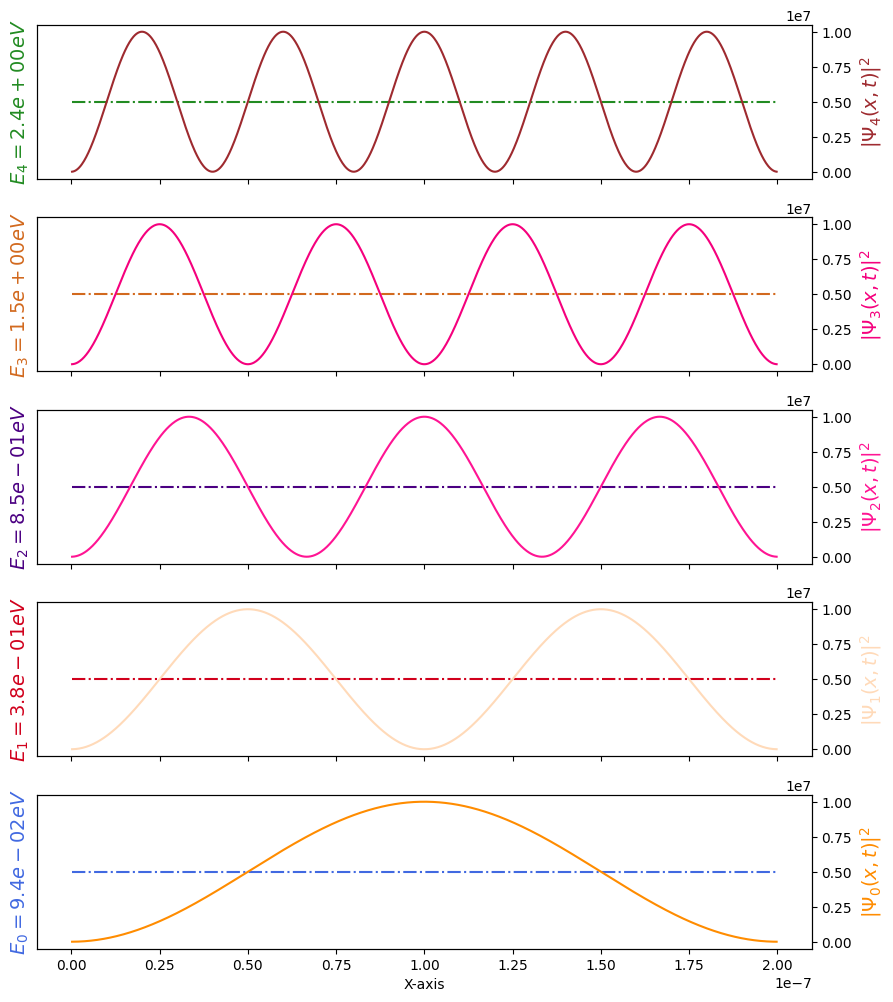

In [133]:
# Create the figure and axis
#N_curves
N_curves = 5
fig, left_axes = plt.subplots(nrows=N_curves, ncols=1, sharex=True, figsize=(10, 12))

right_axes = []

# Define a list of 20 different colors
colors = [
    '#FF2400', '#3F2A9D', '#50C878', '#B22222', '#DC143C', '#9932CC', '#F44336', '#8B0000', '#D1001C', '#FF4500',
    '#D1001C', '#9400D3', '#4169E1', '#4B0082', '#228B22', '#FF6347', '#FFDAB9', '#A0522D', '#D2691E', '#CD853F',
    '#9370DB', '#FF1493', '#FF7F50', '#C71585', '#FF8C00', '#FF6347', '#CC5500', '#9E2A2F', '#FF2400', '#F08080',
    '#6A1E1A', '#FFA07A', '#FFEFD5', '#BDB76B', '#F5007D', '#E97451', '#E30022', '#FF6347', '#A52A2A', '#704214'
]

left_y_min = 0
for i in range(N_curves):

    random_color_y_left = random.choice(colors)
    colors.remove(random_color_y_left)
    random_color_y_right = random.choice(colors)
    colors.remove(random_color_y_right)
    
    left_axes[N_curves-i-1].plot(xaxis, energy_level[i]*np.ones(len(xaxis)),color = random_color_y_left,linestyle='-.')
    #axes[N_curves-i-1].yaxis.set_major_locator(MaxNLocator(nbins=6))
    # Create a second y-axis
    right_axes.append(left_axes[N_curves-i-1].twinx())
    right_axes[i].plot(xaxis, eigenvectors.T[i]**2,color = random_color_y_right)
    left_axes[N_curves-i-1].tick_params(axis = 'y',which='both',left=False,labelleft=False)
    
    left_axes[N_curves-i-1].set_ylabel(r'$E_'+str(i)+'='+f"{energy_level[i]*6.242e+11:.1e}"+"eV$",color=random_color_y_left,fontsize=14)
    right_axes[i].set_ylabel(r'$|\Psi_'+str(i)+'(x,t)|^{2}$',color = random_color_y_right,fontsize=14)

left_axes[N_curves-1].set_xlabel('X-axis')


plt.subplots_adjust(hspace=0.25)

# Show the plot
plt.show()